In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
import numpy as np
import seaborn as sns
import datetime as dt
import cufflinks as cf
from IPython.display import display, HTML
from sodapy import Socrata
import streamlit as st
import mysql.connector
import datetime
import time
from googletrans import Translator

from sqlalchemy import create_engine
from googletrans import Translator
from pathlib import Path
import csv
import os

In [2]:
def calidaDato (data):
    df = data
    calidad = []
    mascara = df.isna().sum()
    for i in range(0,len(mascara)):
        p = (df.shape[0]- mascara[i]) / df.shape[0]
        calidad.append([mascara.index[i], round((p*100),2)])
   
    calidad = pd.DataFrame(calidad)
    calidad.rename(columns={0:'Columna', 1: 'Calida %'}, inplace=True)
    
    return calidad

In [3]:
def renombracol(data):
    data = data
    translator = Translator()
    for i in data.columns:
        b = i.replace('_',' ')
        data.rename(columns={i:b}, inplace=True)
        data.rename(columns={'Entity':'Country'}, inplace=True)
        
    for i in data.columns:
        data.rename(columns={i:translator.translate(i, dest="es").text.title()}, inplace=True)
        
    return data

In [4]:
data = pd.read_csv('C:/Users/x/OneDrive/Escritorio/Agus/Henry DATA 02/emissionsmap/documentation/data\primary-sub-energy-source.csv', sep=',', low_memory=False, encoding='latin-1')

In [5]:
calidad = calidaDato(data)


,Columna,Calida %
0,Entity,100.00
1,Code,69.79
2,Year,100.00
3,Wind Consumption - TWh,96.41
4,Hydro Consumption - TWh,99.89
5,Solar Consumption - TWh,96.17
6,Nuclear Consumption - TWh,91.30
7,Biofuels Consumption - TWh - Total,25.71
8,Geo Biomass Other - TWh,96.56
9,Coal Consumption - TWh,99.58


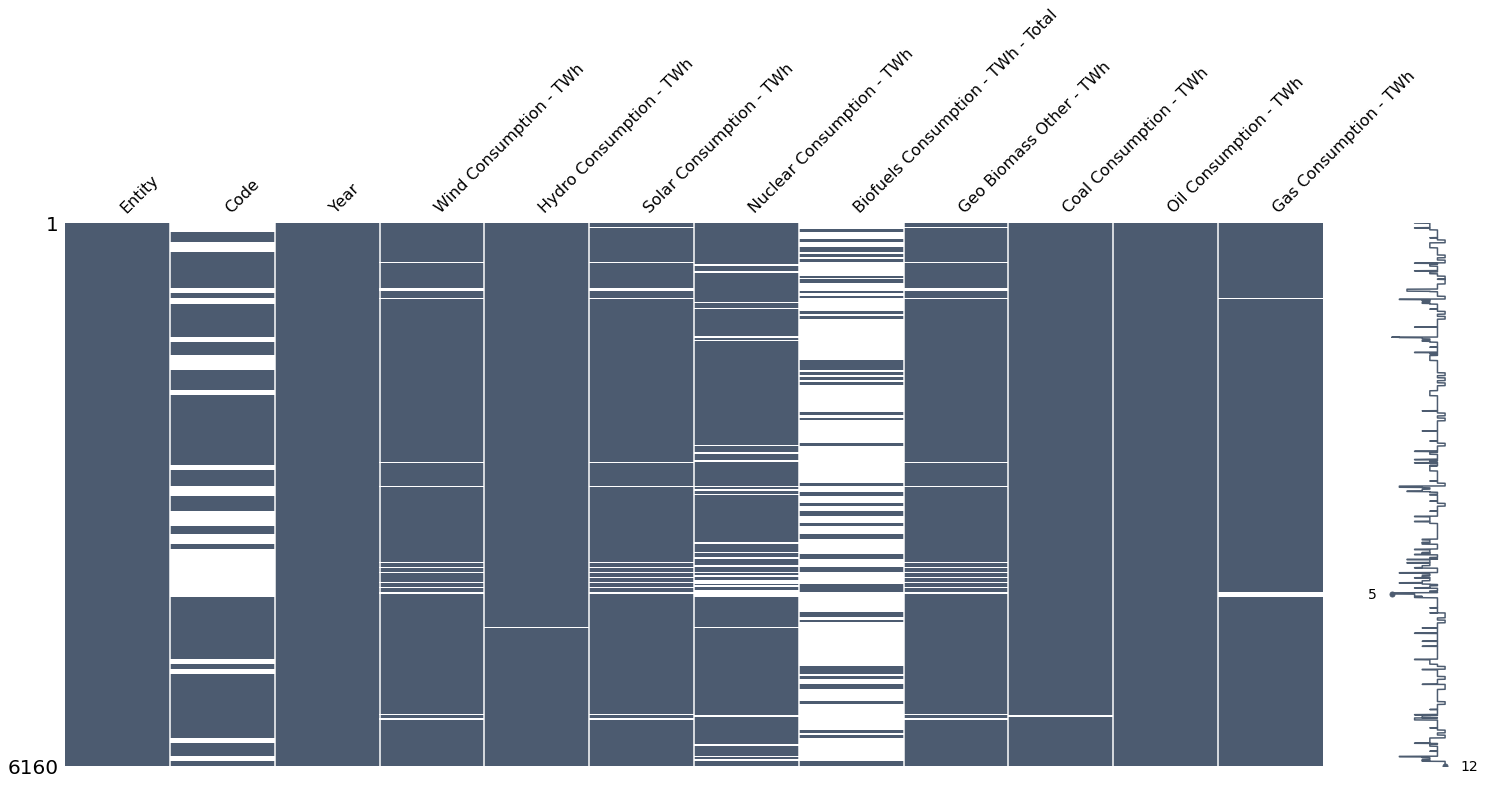

In [6]:
import missingno as msno
msno.matrix(data,color=(0.3,0.36,0.44))

calidad

In [7]:
data = renombracol(data)

In [8]:
data.columns

Index(['País', 'Código', 'Año', 'Consumo Eólico - Twh',
       'Consumo Hidroeléctrico - Twh', 'Consumo Solar - Twh',
       'Consumo Nuclear - Twh', 'Consumo De Biocombustibles - Twh - Total',
       'Geo Biomasa Otros - Twh', 'Consumo De Carbón - Twh',
       'Consumo De Aceite - Twh', 'Consumo De Gas - Twh'],
      dtype='object')

In [9]:
data_2 = pd.read_csv('c:\\Users\\x\\OneDrive\\Escritorio\\Agus\\Henry DATA 02\\emissionsmap\\documentation\\TablasNormal\\Tabla_Hecho.csv', sep=',', low_memory=False, encoding='utf-8')

In [10]:
import os 
os.getcwd()

'c:\\Users\\x\\OneDrive\\Escritorio\\Agus\\Henry DATA 02\\emissionsmap\\documentation'

In [11]:
data_2.head(10)

,Año,País,Combustible,Continente,Id_Año,Id_País,Id_Combustible,Id_Continente
0,1959,World,Biomass,Africa,e4dd5528f7596dcdf871aa55cfccc53c,f5a7924e621e84c9280a9a27e1bcb7f6,57a34c10edc9db4cc4fbfc06367285f8,f5cd262901883dff68d06b215fb0f28e
1,1960,Afghanistan,Coal,Africa (BP),7f16109f1619fd7a733daf5a84c708c1,6e9767f4f15357401b148b9a8ced14ef,ff8cfc4e6a79e6514be2533a5f5506ad,053f824ff9d53e278a73e5e871ae7fad
2,1961,Albania,Cogeneration,Asia,f106b7f99d2cb30c3db1c3cc0fde9ccb,c420ddff824a5c0eec70dd23d62496bc,be8c640ab7313b88c232af9328ebf5a8,154a67340e8c14dd5253dc4ff6120197
3,1962,Algeria,Gas,Asia Pacific (BP),95f6870ff3dcd442254e334a9033d349,575b9408b6daa2ddcefbcf6d81c9b4c9,635459702f9817de29e608fa3395637c,b369c3fc4844b5f7b01a6cdeccdb2459
4,1963,American Samoa,Geothermal,CIS (BP),c215b446bcdf956d848a8419c1b5a920,b86f99753a08d00fa3ca946d07ecac29,3f3f7ddaa26a792f9707f4de5f077cf3,07586405b51e89ecd29cbce8c60e664e
5,1964,Angola,Hydro,Central America (BP),39dcaf7a053dc372fbc391d4e6b5d693,232bf11cb81bcdb269f76a08fde8b947,d39272062cb0972db88531c24f5cc664,379b63cbcca7c2950f33de34cca5769c
6,1965,Antarctica,Nuclear,Eastern Africa (BP),d46e1fcf4c07ce4a69ee07e4134bcef1,44b439ba9975f8e802b456777c54a854,c49e6d739a7a7356e88aa84503666ee9,cef9a575195f5df6acaa4469cb5ba78a
7,1966,Antigua and Barbuda,Oil,Europe,3683af9d6f6c06acee72992f2977f67e,f7e68bf0791888ebcd5bfc62e022aa83,2e69df5961f20aee0897cf1905156344,912d59cdf1d3f551fae21f6f0062258f
8,1967,Argentina,Other,Europe (BP),a82d922b133be19c1171534e6594f754,3536be57ce0713954e454ae6c53ec023,6311ae17c1ee52b36e68aaf4ad066387,c5321970b2a5bda367ad77512ede889e
9,1968,Armenia,Petcoke,European Union (27),98c7242894844ecd6ec94af67ac8247d,a00c273f0f497484093fa94865cf5ca5,35da6b9bd3f02f14357449b47dadb6ed,34d7c3ff1a5a2f42e5cd528096cfc3a2


In [9]:
data

,País,Código,Año,Consumo Eólico - Twh,Consumo Hidroeléctrico - Twh,Consumo Solar - Twh,Consumo Nuclear - Twh,Consumo De Biocombustibles - Twh - Total,Geo Biomasa Otros - Twh,Consumo De Carbón - Twh,Consumo De Aceite - Twh,Consumo De Gas - Twh
0,Africa,NaN,1965,0.000000,41.118813,NaN,0.000000,NaN,NaN,323.496124,341.262756,9.543755
1,Africa,NaN,1966,0.000000,45.862915,NaN,0.000000,NaN,NaN,323.122192,369.486572,10.669916
2,Africa,NaN,1967,0.000000,47.875538,NaN,0.000000,NaN,NaN,330.291565,368.125244,10.545670
3,Africa,NaN,1968,0.000000,56.000469,NaN,0.000000,NaN,NaN,343.512909,389.199860,10.688970
4,Africa,NaN,1969,0.000000,65.352089,NaN,0.000000,NaN,NaN,346.642944,396.922852,12.492000
...,...,...,...,...,...,...,...,...,...,...,...,...
6155,World,OWID_WRL,2017,3034.916992,10831.405273,1185.515137,6734.873535,972.534302,596.420471,43751.675781,52515.542969,36529.222656
6156,World,OWID_WRL,2018,3360.018799,11067.517578,1524.549805,6856.016602,1045.907959,643.032043,44315.875000,53250.621094,38356.300781
6157,World,OWID_WRL,2019,3744.515137,11153.791992,1855.592163,7073.289551,1120.149414,674.745361,43699.886719,53368.628906,39062.945312
6158,World,OWID_WRL,2020,4192.682129,11413.828125,2222.443115,6789.301758,1065.564941,703.916443,41963.964844,48380.710938,38455.726562


In [9]:
import hashlib
def hash(df,colum):
    nom = "Id" + colum
    if df[colum].dtype == 'int64':
        df[colum] = df[colum].astype(str)
        df[nom] = df[colum].apply(lambda x: hashlib.md5(x.encode()).hexdigest())
        df[colum] = df[colum].astype(int)
    else:
        df[nom] = df[colum].apply(lambda x: hashlib.md5(x.encode()).hexdigest())
    return df

In [10]:
primary_energy = hash(data, 'País')

In [13]:
primary_energy

,País,Código,Año,Consumo Eólico - Twh,Consumo Hidroeléctrico - Twh,Consumo Solar - Twh,Consumo Nuclear - Twh,Consumo De Biocombustibles - Twh - Total,Geo Biomasa Otros - Twh,Consumo De Carbón - Twh,Consumo De Aceite - Twh,Consumo De Gas - Twh,IdPaís,IdAño
0,Africa,NaN,1965,0.000000,41.118813,NaN,0.000000,NaN,NaN,323.496124,341.262756,9.543755,f5cd262901883dff68d06b215fb0f28e,d46e1fcf4c07ce4a69ee07e4134bcef1
1,Africa,NaN,1966,0.000000,45.862915,NaN,0.000000,NaN,NaN,323.122192,369.486572,10.669916,f5cd262901883dff68d06b215fb0f28e,3683af9d6f6c06acee72992f2977f67e
2,Africa,NaN,1967,0.000000,47.875538,NaN,0.000000,NaN,NaN,330.291565,368.125244,10.545670,f5cd262901883dff68d06b215fb0f28e,a82d922b133be19c1171534e6594f754
3,Africa,NaN,1968,0.000000,56.000469,NaN,0.000000,NaN,NaN,343.512909,389.199860,10.688970,f5cd262901883dff68d06b215fb0f28e,98c7242894844ecd6ec94af67ac8247d
4,Africa,NaN,1969,0.000000,65.352089,NaN,0.000000,NaN,NaN,346.642944,396.922852,12.492000,f5cd262901883dff68d06b215fb0f28e,4d8556695c262ab91ff51a943fdd6058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6155,World,OWID_WRL,2017,3034.916992,10831.405273,1185.515137,6734.873535,972.534302,596.420471,43751.675781,52515.542969,36529.222656,f5a7924e621e84c9280a9a27e1bcb7f6,8d8818c8e140c64c743113f563cf750f
6156,World,OWID_WRL,2018,3360.018799,11067.517578,1524.549805,6856.016602,1045.907959,643.032043,44315.875000,53250.621094,38356.300781,f5a7924e621e84c9280a9a27e1bcb7f6,84ddfb34126fc3a48ee38d7044e87276
6157,World,OWID_WRL,2019,3744.515137,11153.791992,1855.592163,7073.289551,1120.149414,674.745361,43699.886719,53368.628906,39062.945312,f5a7924e621e84c9280a9a27e1bcb7f6,ea6b2efbdd4255a9f1b3bbc6399b58f4
6158,World,OWID_WRL,2020,4192.682129,11413.828125,2222.443115,6789.301758,1065.564941,703.916443,41963.964844,48380.710938,38455.726562,f5a7924e621e84c9280a9a27e1bcb7f6,7b7a53e239400a13bd6be6c91c4f6c4e


In [12]:
primary_energy = hash(primary_energy, 'Año')

In [15]:
def cambiarIndex(df,nomb_col):
    df.set_index(nomb_col, inplace=True)
    df = df.reset_index()
    return df

In [16]:
primary_energy = cambiarIndex(primary_energy, 'IdPaís')

In [17]:
primary_energy = cambiarIndex(primary_energy, 'IdAño')

In [18]:
primary_energy

,IdAño,IdPaís,País,Código,Año,Consumo Eólico - Twh,Consumo Hidroeléctrico - Twh,Consumo Solar - Twh,Consumo Nuclear - Twh,Consumo De Biocombustibles - Twh - Total,Geo Biomasa Otros - Twh,Consumo De Carbón - Twh,Consumo De Aceite - Twh,Consumo De Gas - Twh
0,d46e1fcf4c07ce4a69ee07e4134bcef1,f5cd262901883dff68d06b215fb0f28e,Africa,NaN,1965,0.000000,41.118813,NaN,0.000000,NaN,NaN,323.496124,341.262756,9.543755
1,3683af9d6f6c06acee72992f2977f67e,f5cd262901883dff68d06b215fb0f28e,Africa,NaN,1966,0.000000,45.862915,NaN,0.000000,NaN,NaN,323.122192,369.486572,10.669916
2,a82d922b133be19c1171534e6594f754,f5cd262901883dff68d06b215fb0f28e,Africa,NaN,1967,0.000000,47.875538,NaN,0.000000,NaN,NaN,330.291565,368.125244,10.545670
3,98c7242894844ecd6ec94af67ac8247d,f5cd262901883dff68d06b215fb0f28e,Africa,NaN,1968,0.000000,56.000469,NaN,0.000000,NaN,NaN,343.512909,389.199860,10.688970
4,4d8556695c262ab91ff51a943fdd6058,f5cd262901883dff68d06b215fb0f28e,Africa,NaN,1969,0.000000,65.352089,NaN,0.000000,NaN,NaN,346.642944,396.922852,12.492000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6155,8d8818c8e140c64c743113f563cf750f,f5a7924e621e84c9280a9a27e1bcb7f6,World,OWID_WRL,2017,3034.916992,10831.405273,1185.515137,6734.873535,972.534302,596.420471,43751.675781,52515.542969,36529.222656
6156,84ddfb34126fc3a48ee38d7044e87276,f5a7924e621e84c9280a9a27e1bcb7f6,World,OWID_WRL,2018,3360.018799,11067.517578,1524.549805,6856.016602,1045.907959,643.032043,44315.875000,53250.621094,38356.300781
6157,ea6b2efbdd4255a9f1b3bbc6399b58f4,f5a7924e621e84c9280a9a27e1bcb7f6,World,OWID_WRL,2019,3744.515137,11153.791992,1855.592163,7073.289551,1120.149414,674.745361,43699.886719,53368.628906,39062.945312
6158,7b7a53e239400a13bd6be6c91c4f6c4e,f5a7924e621e84c9280a9a27e1bcb7f6,World,OWID_WRL,2020,4192.682129,11413.828125,2222.443115,6789.301758,1065.564941,703.916443,41963.964844,48380.710938,38455.726562


In [19]:
from operator import index


def subircsv(nomcarpeta, nomarchivo, extencion, df):
    df = df
    filepath = Path(nomcarpeta + '/' + nomarchivo +'.' + extencion)  
    filepath.parent.mkdir(parents=True, exist_ok=True)  
    df.to_csv(filepath, index=False) 

In [20]:
subircsv('TablasNormal','primary_energy', 'csv', primary_energy)

In [17]:
from operator import index


def subircsv(nomcarpeta, nomarchivo, extencion, df):
    df = data
    filepath = Path(nomcarpeta + '/' + nomarchivo +'.' + extencion)  
    filepath.parent.mkdir(parents=True, exist_ok=True)  
    df.to_csv(filepath, index=False)  

In [20]:
from operator import index

In [27]:
data.to_csv('c:\\Users\\x\\OneDrive\\Escritorio\\Agus\\Henry DATA 02\\emissionsmap\\documentation\\TablasNormal\\primary-energy.csv', index=False)  

In [17]:
top05_3 = pd.merge(data, data_2[['Año', 'Id_Año']], on=['Año'], how='left')

In [24]:
top05_3['País']

0       Africa
1       Africa
2       Africa
3       Africa
4       Africa
         ...  
6155     World
6156     World
6157     World
6158     World
6159     World
Name: País, Length: 6160, dtype: object